In [1]:
import pandas as pd
import glob

path = r'C:\Users\flori\OneDrive\Documents\Logitech\tests\rocket-meister\results' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [2]:
df

,Wall time,Step,Value
0,1.634040e+09,9,-1.602587
1,1.634040e+09,19,4.151591
2,1.634040e+09,29,4.151591
3,1.634040e+09,39,4.151591
4,1.634040e+09,49,4.930048
...,...,...,...
3091,1.634195e+09,54229,36.669235
3092,1.634195e+09,54239,36.669235
3093,1.634195e+09,54249,39.317085
3094,1.634195e+09,54259,36.946262


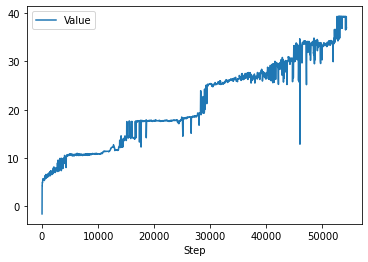

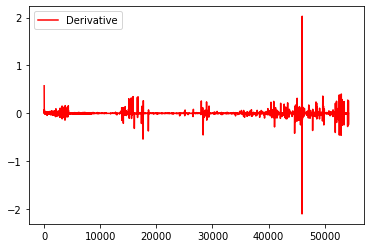

In [3]:
import matplotlib.pyplot as plt
ax = plt.gca()
df.plot(kind='line',x='Step',y='Value',ax=ax)
import numpy as np

y_p = np.diff(df['Value']) / np.diff(df['Step'])
x_p = (np.array(df['Step'])[:-1] + np.array(df['Step'])[1:]) / 2

plt.figure()
plt.plot(x_p,y_p, 'r',label='Derivative')
plt.legend()
plt.show()

In [34]:
slope = pd.Series(np.gradient(df.Value), df.Step, name='slope')